------------------------------------------------------------------------------------------------------------------------------
# Loan Default

- The goal of the problem will be to predict whether a client will default on the loan payment or not to distinguish future applicants who might default.

------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Importing libraries

import pandas as pd

import numpy as np

from sklearn import linear_model

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style = 'darkgrid')

In [2]:
# Loading the data

train = pd.read_csv('Downloads/training_data.csv')
test = pd.read_csv('Downloads/testing_data.csv')

In [3]:
#Copying the data for pre-processing

train1 = train.copy()


In [4]:
# Viewing first 5 rows of dataset

train1.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [5]:
# Viewing first 5 rows of dataset

test1.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,...,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,...,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No


In [6]:
# Checking the info of the data

train1.info()
print('\n')
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [7]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         45000 non-null  int64 
 1   Date_Of_Disbursement       44892 non-null  object
 2   Business                   44994 non-null  object
 3   Jobs_Reatained             45000 non-null  int64 
 4   Jobs_Created               45000 non-null  int64 
 5   Year_Of_Commitment         45000 non-null  object
 6   Guaranteed_Approved _Loan  45000 non-null  object
 7   Borrower_Name              44998 non-null  object
 8   Low_Documentation_Loan     44867 non-null  object
 9   Demography                 45000 non-null  object
 10  State_Of_Bank              45000 non-null  object
 11  ChargedOff_Amount          45000 non-null  object
 12  Borrower_City              45000 non-null  object
 13  Borrower_State             44951 non-null  object
 14  Gross_

In [8]:
train1.ID.nunique()

105000

**Observation:**

- The training dataset has 105,000 rows and 26 columns.
- Columns in the Dataset are of object and numeric type.
- There are some null values in the dataset.
- ID column is an identifier and has all unique entries. 

In [9]:
# Checking Statistical summary of data

train1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"105,000.00","52,499.50","30,311.03",0.00,"26,249.75","52,499.50","78,749.25","104,999.00"
Jobs_Reatained,"105,000.00",12.69,270.54,0.00,0.00,1.00,4.00,"8,800.00"
Jobs_Created,"105,000.00",10.38,270.34,0.00,0.00,0.00,1.00,"8,800.00"
Count_Employees,"105,000.00",9.90,58.16,0.00,2.00,4.00,9.00,"7,200.00"
Classification_Code,"105,000.00","405,918.30","260,335.96",0.00,"236,115.00","447,110.00","561,740.00","928,120.00"
Loan_Term,"105,000.00",156.44,116.41,0.00,90.00,126.00,180.00,692.00
Primary_Loan_Digit,"105,000.00","4,661,622,163.72","2,546,598,534.84","1,000,034,009.00","2,478,163,259.25","4,119,823,502.00","6,760,484,004.50","9,996,003,010.00"
Code_Franchise,"105,000.00","2,707.20","12,660.61",0.00,0.00,1.00,1.00,"92,006.00"
Default,"105,000.00",0.28,0.45,0.00,0.00,0.00,1.00,1.00


**Observation:**

- The employee count in each company ranges from 0 to 7200, with a median of 4 employees and an average of 10 employees.
- The loan term ranges from 0 to 692 months (57.5 years), with a median of 126 months and average of 156.4 months.  

**Data Cleaning**

In [10]:
# Dropping null values

train1 = train1.dropna()
train1.shape

(103894, 26)

In [11]:
# Checking for categories in the variable 

train1['Business'].value_counts()

Existing    74375
New         29415
0             104
Name: Business, dtype: int64

In [12]:
# Eliminate rows where 'Business' == 0 from the training data

train1 = train1[train1["Business"]!='0']
train1.Business.value_counts()

Existing    74375
New         29415
Name: Business, dtype: int64

In [13]:
# Checking for categories in the variable

train1['Low_Documentation_Loan'].value_counts()

No     91577
Yes    11818
0        148
S         95
C         87
A         59
R          6
Name: Low_Documentation_Loan, dtype: int64

In [121]:
# Eliminate rows where category undefined from the training data

test = test[test["Business"]!='0']

ls = ['0','S', 'C', 'A', 'R']
for i in ls:
    test = test[test['Low_Documentation_Loan'] != i]
    
ls1 = ['0', 'R', 'T', '`', '1', '2', '4', '.', 'C']

for i in ls1:
    test = test.drop(test[test['Revolving_Credit_Line'] == i].index)

test2 = test.copy()



In [126]:
test3 = test.copy()
test3.drop(['ID', 'State_Of_Bank','Date_Of_Disbursement' , 'Year_Of_Commitment ','Borrower_Name ', 'Classification_Code ', 'Name_Of_Bank', 'Primary_Loan_Digit', 'Commitment_Date','Loan_Approved_Gross','Guaranteed_Approved _Loan','Gross_Amount_Balance', 'Borrower_City', 'Borrower_State'], axis = 1, inplace = True)

In [127]:
test3['ChargedOff_Amount '] = test3['ChargedOff_Amount '].astype(str)
test3['Gross_Amount_Disbursed  '] = test3['Gross_Amount_Disbursed  '].astype(str)

test3['ChargedOff_Amount '] = test3['ChargedOff_Amount '].str.replace('Rs.', '')
test3['Gross_Amount_Disbursed  '] = test3['Gross_Amount_Disbursed  '].str.replace('Rs.', '')
test3['ChargedOff_Amount '] = test3['ChargedOff_Amount '].astype(float)
test3['Gross_Amount_Disbursed  '] = test3['Gross_Amount_Disbursed  '].astype(float)

test3['Jobs_Total'] = test3['Jobs_Reatained'] + test3['Jobs_Created ']
test3.drop(['Jobs_Reatained', 'Jobs_Created '], axis = 1, inplace = True)

In [14]:
# Eliminate rows where category undefined from 'Low_Documentation_Loan' column

ls = ['0','S', 'C', 'A', 'R']
for i in ls:
    train1 = train1[train1['Low_Documentation_Loan'] != i]
    
train1['Low_Documentation_Loan'].value_counts()

No     91577
Yes    11818
Name: Low_Documentation_Loan, dtype: int64

In [15]:
# Checking for categories in the variable

train1['Revolving_Credit_Line'].value_counts()

No     47405
0      29525
Yes    24349
T       2104
R          4
`          2
1          2
2          1
4          1
.          1
C          1
Name: Revolving_Credit_Line, dtype: int64

In [16]:
# Eliminate rows where category undefined from the training data

ls1 = ['0', 'R', 'T', '`', '1', '2', '4', '.', 'C']

for i in ls1:
    train1 = train1.drop(train1[train1['Revolving_Credit_Line'] == i].index)
    #test1 = test1.drop(test1[test1['Revolving_Credit_Line'] == i].index)

train1['Revolving_Credit_Line'].value_counts()
    

No     47405
Yes    24349
Name: Revolving_Credit_Line, dtype: int64

In [17]:
train1.shape

(71754, 26)

In [18]:
# Checking for duplicated rows

train1.duplicated().sum()

0

In [19]:
train1.nunique()

ID                           71754
Date_Of_Disbursement          3375
Business                         2
Jobs_Reatained                 173
Jobs_Created                   111
Year_Of_Commitment              91
Guaranteed_Approved _Loan     7661
Borrower_Name                70156
Low_Documentation_Loan           2
Demography                       3
State_Of_Bank                   34
ChargedOff_Amount            16314
Borrower_City                 1193
Borrower_State                  41
Gross_Amount_Balance             2
Count_Employees                258
Classification_Code           1173
Loan_Approved_Gross           4565
Gross_Amount_Disbursed       20330
Loan_Term                      341
Commitment_Date               7636
Primary_Loan_Digit           71754
Code_Franchise                 845
Name_Of_Bank                   143
Revolving_Credit_Line            2
Default                          2
dtype: int64

In [20]:
# Dropping un-necessary columns

train1.drop(['ID', 'Date_Of_Disbursement' , 'Year_Of_Commitment ','Borrower_Name ', 'Classification_Code ', 'Name_Of_Bank', 'Primary_Loan_Digit', 'Commitment_Date','Loan_Approved_Gross','Guaranteed_Approved _Loan','Gross_Amount_Balance', 'Borrower_City', 'Borrower_State'], axis = 1, inplace = True)
test1.drop(['ID', 'Date_Of_Disbursement' , 'Year_Of_Commitment ','Borrower_Name ', 'Classification_Code ', 'Name_Of_Bank', 'Primary_Loan_Digit', 'Commitment_Date','Loan_Approved_Gross','Guaranteed_Approved _Loan','Gross_Amount_Balance', 'Borrower_City', 'Borrower_State'], axis = 1, inplace = True)

In [21]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71754 entries, 0 to 104997
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Business                  71754 non-null  object
 1   Jobs_Reatained            71754 non-null  int64 
 2   Jobs_Created              71754 non-null  int64 
 3   Low_Documentation_Loan    71754 non-null  object
 4   Demography                71754 non-null  object
 5   State_Of_Bank             71754 non-null  object
 6   ChargedOff_Amount         71754 non-null  object
 7   Count_Employees           71754 non-null  int64 
 8   Gross_Amount_Disbursed    71754 non-null  object
 9   Loan_Term                 71754 non-null  int64 
 10  Code_Franchise            71754 non-null  int64 
 11  Revolving_Credit_Line     71754 non-null  object
 12  Default                   71754 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 7.7+ MB


**Observation:**

- Training data no longer contain null values and unnecessary columns have been dropped.

In [22]:
# Trying to identify pattern for business type in each "Code franchise" 

train3 = train.groupby('Code_Franchise')
train3 = train3.get_group(0)
train3.head(10)

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
6,6,10/31/2007 0:00,New,3,3,2007,Rs.1016000.0,"Diffusion Limited, LLC",No,Urban,...,541618,Rs.2032000.0,Rs.7063232.0,96,31-Jul-07,2607855005,0,Dhanlaxmi Bank Ltd.,Yes,1
8,8,31-Aug-09,New,1,3,2007,Rs.4925568.0,"J & K Fitness, Inc.",No,Urban,...,713940,Rs.9851136.0,Rs.9851136.0,126,30-Nov-06,2153365005,0,HDFC Bank Ltd,No,0
12,12,31-May-09,Existing,1,0,2009,Rs.2032000.0,"J.D. Floorworks, Inc. dba Floo",No,Urban,...,442210,Rs.4064000.0,Rs.8292835.84,75,22-May-09,3435295000,0,Bandhan Bank Ltd.,Yes,1
13,13,31-Jul-05,Existing,7,0,2005,Rs.1016000.0,"2201 Shore, Inc.",No,Rural,...,722211,Rs.2032000.0,Rs.4010517.7600000002,87,30-Jun-05,1359555004,0,HDFC Bank Ltd,Yes,0
15,15,31-Aug-05,New,2,0,2005,Rs.4064000.0,"COMMERCIAL SERVICES EXPRESS, I",No,Urban,...,423440,Rs.8128000.0,Rs.8128000.0,0,9-Aug-05,1405565009,0,City Union Bank Ltd.,No,1
17,17,31-Dec-07,New,1,0,2008,Rs.203200.0,Le Bouder LLC,No,Urban,...,541618,Rs.406400.0,Rs.528320.0,126,15-Nov-07,2812785007,0,ICICI Bank Ltd.,Yes,0
18,18,1-Aug-10,Existing,2,0,2010,Rs.1016000.0,Advance Industries Inc,No,Urban,...,238330,Rs.2032000.0,Rs.3575263.36,126,28-Jan-10,3878685009,0,Karur Vysya Bank Ltd.,Yes,0
20,20,30-Sep-05,Existing,3,0,2005,Rs.1910080.0,"Sap-Sap, LLC dba East West Gri",No,Urban,...,722211,Rs.3820160.0,Rs.7750210.5600000005,28,28-Jul-05,1391885009,0,ICICI Bank Ltd.,Yes,1
25,25,30-Jun-09,Existing,16,2,2009,Rs.5283200.0,"Hi Rise Amenities, Inc.",No,Urban,...,722211,Rs.10566400.0,Rs.10566400.0,90,28-Apr-09,3397245005,0,Dhanlaxmi Bank Ltd.,No,0


**Observation:**
- For Code_Franchise 0 there seems to be business types of diverse nature (i.e. Cleaning services, Construction, Automibile e.t.c)

### **Feature Engineering**

In [23]:
# Removing currency symbol and converting the Currency columns from object to float

train1['ChargedOff_Amount '] = train1['ChargedOff_Amount '].astype(str)
train1['Gross_Amount_Disbursed  '] = train1['Gross_Amount_Disbursed  '].astype(str)

train1['ChargedOff_Amount '] = train1['ChargedOff_Amount '].str.replace('Rs.', '')
train1['Gross_Amount_Disbursed  '] = train1['Gross_Amount_Disbursed  '].str.replace('Rs.', '')
train1['ChargedOff_Amount '] = train1['ChargedOff_Amount '].astype(float)
train1['Gross_Amount_Disbursed  '] = train1['Gross_Amount_Disbursed  '].astype(float)

test1['ChargedOff_Amount '] = test1['ChargedOff_Amount '].astype(str)
test1['Gross_Amount_Disbursed  '] = test1['Gross_Amount_Disbursed  '].astype(str)

test1['ChargedOff_Amount '] = test1['ChargedOff_Amount '].str.replace('Rs.', '')
test1['Gross_Amount_Disbursed  '] = test1['Gross_Amount_Disbursed  '].str.replace('Rs.', '')
test1['ChargedOff_Amount '] = test1['ChargedOff_Amount '].astype(float)
test1['Gross_Amount_Disbursed  '] = test1['Gross_Amount_Disbursed  '].astype(float)

In [24]:
# Creating new column Jobs_Total

train1['Jobs_Total'] = train1['Jobs_Reatained'] + train1['Jobs_Created ']
train1.drop(['Jobs_Reatained', 'Jobs_Created '], axis = 1, inplace = True)

test1['Jobs_Total'] = test1['Jobs_Reatained'] + test1['Jobs_Created ']
test1.drop(['Jobs_Reatained', 'Jobs_Created '], axis = 1, inplace = True)

train1.head(5)

,Business,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Count_Employees,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Revolving_Credit_Line,Default,Jobs_Total
0,Existing,No,Undefined,AP,0.00,38,"40,640,000.00",126,1,No,0,0
2,Existing,No,Urban,AS,0.00,4,"5,961,400.32",90,1,Yes,0,4
3,New,No,Urban,BR,0.00,7,"4,064,000.00",126,0,Yes,0,10
6,New,No,Urban,AS,"2,022,896.64",2,"7,063,232.00",96,0,Yes,1,6
7,Existing,No,Undefined,CG,0.00,10,"4,470,400.00",270,1,No,0,0


### **Univariate Analysis**

In [25]:
train['Default'].value_counts(normalize = True)

0   0.72
1   0.28
Name: Default, dtype: float64

- **Only 28% of data points represent the class Default.**

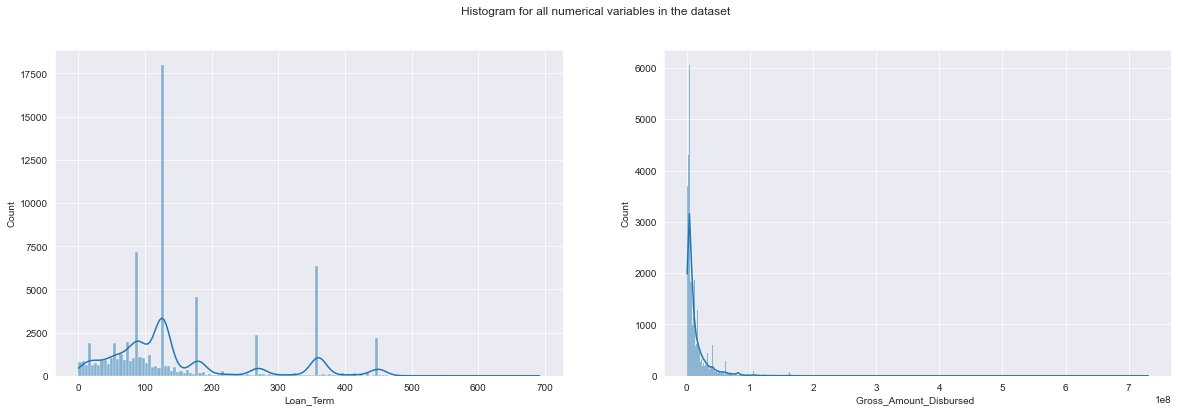

In [26]:
# Histogram for all numerical variables in the dataset

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
  
fig.suptitle('Histogram for all numerical variables in the dataset')
  
sns.histplot(x = 'Loan_Term', data = train1, kde = True, ax = axes[0]);

sns.histplot(x = 'Gross_Amount_Disbursed  ', data = train1, kde = True, ax = axes[1]);

**Observations:**

- Histograms do not folow a normal distribution and histogram for Gross_Amount_Disbursed is right-skewed.

**Countplot for Numerical Variables**

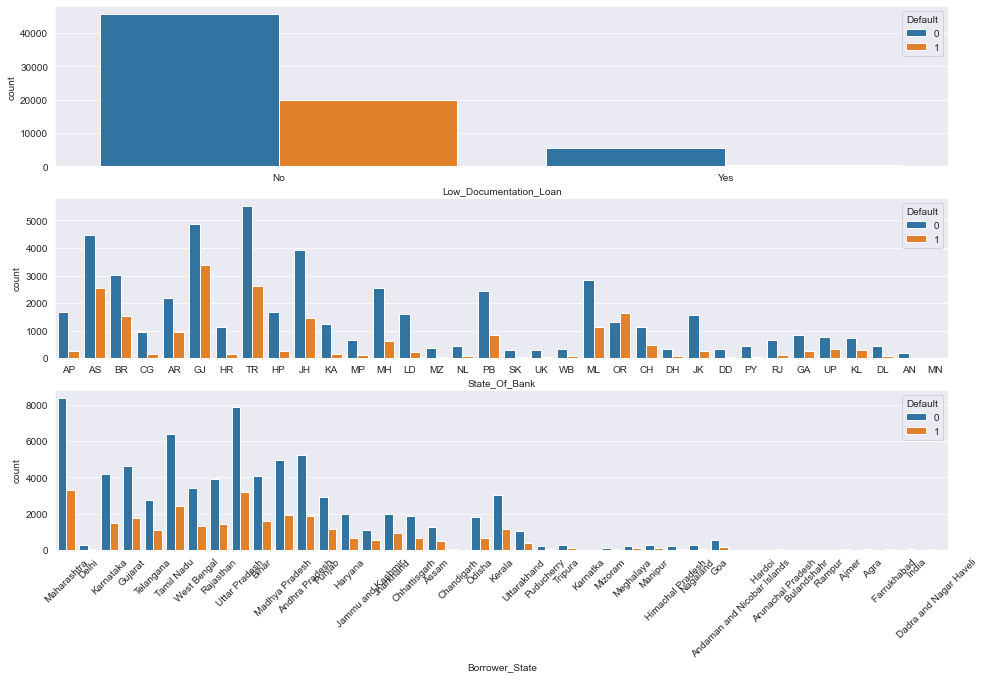

In [27]:
fig, axes = plt.subplots(3, 1, figsize = (16, 10))

sns.countplot( x = 'Low_Documentation_Loan', hue = "Default", data = train1, ax = axes[0])

sns.countplot( x = 'State_Of_Bank', hue = "Default", data = train1, ax = axes[1])
plt.xticks(rotation = 45);
sns.countplot( x = 'Borrower_State', hue = "Default", data = train, ax = axes[2])
plt.xticks(rotation = 45);

**Observation:**

- Countplot for "Low_Documentation" shows that when low_documention is Yes, the customer almost always defaults, this likely be an important feature for our model training.
- From the countplot of the state, we can deduce that each state has almost the same proportion of non-defaulters and defaulters. This column dont look really useful for our prediction model. 

### **Bivariate Analysis**

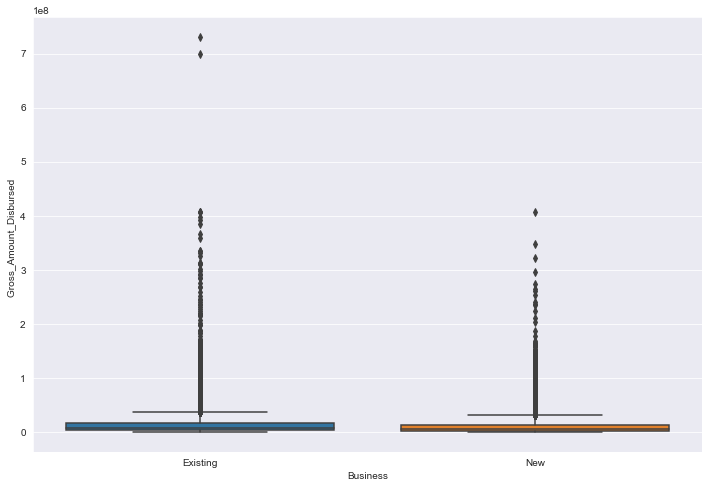

In [28]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = train1, x = "Business", y = "Gross_Amount_Disbursed  ")

plt.show()

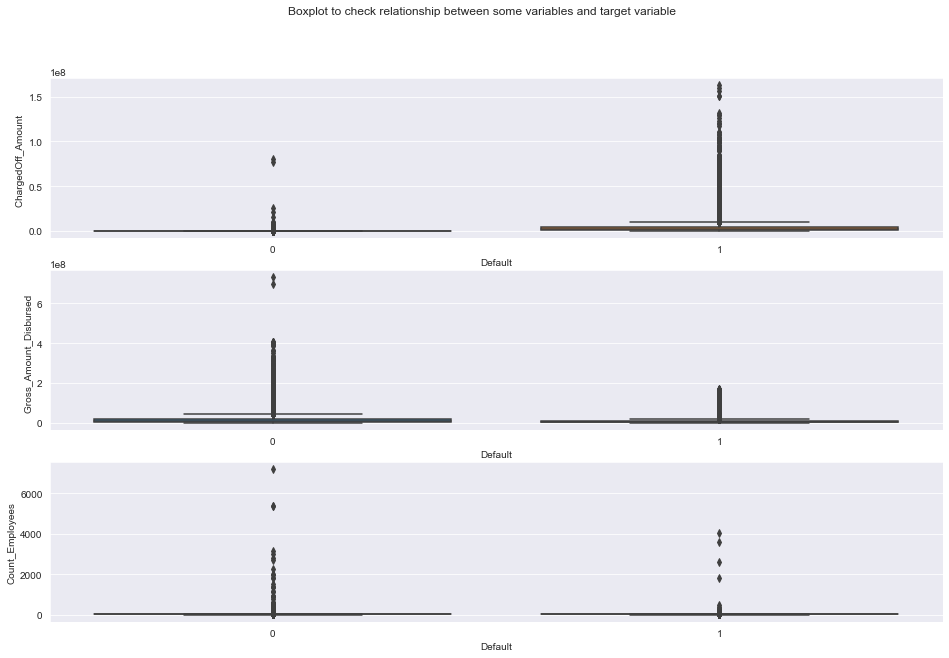

In [29]:
fig, axes = plt.subplots(3, 1, figsize = (16, 10))
  

fig.suptitle('Boxplot to check relationship between some variables and target variable')
  
sns.boxplot(x = 'Default', y = 'ChargedOff_Amount ', data = train1, ax = axes[0]);
sns.boxplot(x = 'Default', y = 'Gross_Amount_Disbursed  ', data = train1, ax = axes[1]);

sns.boxplot(x = 'Default', y = 'Count_Employees', data = train1, ax = axes[2]);

**Observations:**
- From the boxplot, looks like higher 'chargedoff_amount' are more likely to default.

In [30]:
# Let us define a dictionary to replace the Yes/No with numerical values 1 and 0

encoding_dict = {'Yes': 1, 'No': 0}

In [31]:
# Encoding the features

train2 = train1.copy()
train2['Low_Documentation_Loan'] = train1['Low_Documentation_Loan'].map(encoding_dict)
train2['Revolving_Credit_Line'] = train1['Revolving_Credit_Line'].map(encoding_dict)

In [32]:
train2.drop('State_Of_Bank', axis = 1, inplace = True)

In [33]:
train2['Demography'].value_counts()

Urban        36675
Undefined    27368
Rural         7711
Name: Demography, dtype: int64

In [34]:
train2.Demography = pd.factorize(train2.Demography)[0]

train2.Business = pd.factorize(train2.Business)[0]

In [35]:
train2.head(5)

,Business,Low_Documentation_Loan,Demography,ChargedOff_Amount,Count_Employees,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Revolving_Credit_Line,Default,Jobs_Total
0,0,0,0,0.00,38,"40,640,000.00",126,1,0,0,0
2,0,0,1,0.00,4,"5,961,400.32",90,1,1,0,4
3,1,0,1,0.00,7,"4,064,000.00",126,0,1,0,10
6,1,0,1,"2,022,896.64",2,"7,063,232.00",96,0,1,1,6
7,0,0,0,0.00,10,"4,470,400.00",270,1,0,0,0


## **Modelling**

- **Building LDA & QDA Models**

In [36]:
# Importing sklearn LDA & QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Using only one feature 'ChargedOff_Amount' to build model

ChargedOff_Amount = train2['ChargedOff_Amount '].values.reshape(len(train2['ChargedOff_Amount ']), 1)
Default = train2.Default.values.reshape(len(train2['Default']), 1)

features = ['Business', 'Low_Documentation_Loan', 'Demography', 'ChargedOff_Amount ', 'Count_Employees', 'Gross_Amount_Disbursed  ', 'Loan_Term', 'Code_Franchise', 'Jobs_Total', 'Revolving_Credit_Line']

# Fitting a LDA model

lda = LinearDiscriminantAnalysis()

lda.fit(ChargedOff_Amount, train2['Default'])

lda_error_rate = (1 - lda.score(ChargedOff_Amount, Default))*100

# Fitting a QDA model

qda = QuadraticDiscriminantAnalysis()

qda.fit(ChargedOff_Amount, train2['Default'])

qda_error_rate = (1 - qda.score(ChargedOff_Amount, Default))*100

print("LDA error rate while using only ChargedOff_Amount as a feature is {}% ".format(np.round(lda_error_rate, 2)))

print("QDA error rate while using only ChargedOff_Amount as a feature is {}%".format(np.round(qda_error_rate, 2)))

LDA error rate while using only ChargedOff_Amount as a feature is 23.51% 
QDA error rate while using only ChargedOff_Amount as a feature is 8.34%


In [37]:
# Using only one feature 'Low_Documentation_Loan' to build model

Low_Documentation_Loan = train2.Low_Documentation_Loan.values.reshape(len(train2['Low_Documentation_Loan']), 1)

lda = LinearDiscriminantAnalysis()

lda.fit(Low_Documentation_Loan, train2['Default'])

lda_error_rate = (1 - lda.score(Low_Documentation_Loan, Default))*100

# Fitting a QDA model

qda = QuadraticDiscriminantAnalysis()

qda.fit(Low_Documentation_Loan, train2['Default'])

qda_error_rate = (1 - qda.score(Low_Documentation_Loan, Default))*100

print("LDA error rate while using only Low Documentation as a feature is {}% ".format(np.round(lda_error_rate, 2)))

print("QDA error rate while using only Low Documentation as a feature is {}%".format(np.round(qda_error_rate, 2)))

LDA error rate while using only Low Documentation as a feature is 28.48% 
QDA error rate while using only Low Documentation as a feature is 28.48%


In [38]:
# Let us now use all the features
lda.fit(train2[features], train2['Default'])

qda.fit(train2[features], train2['Default'])

new_lda_error_rate = (1 - lda.score(train2[features], train2['Default']))*100

new_qda_error_rate = (1 - qda.score(train2[features], train2['Default']))*100

print("LDA error rate using all the features is {}% ".format(np.round(new_lda_error_rate, 2)))

print("QDA error rate using all the features is {}%".format(np.round(new_qda_error_rate, 2)))

LDA error rate using all the features is 15.0% 
QDA error rate using all the features is 3.6%


**Observations:**

- We observe that by using all the features to predict default, the error rate has reduced.
- QDA has much better performance than LDA as expected

In [39]:
# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Default', 'Default'], yticklabels = ['Not Default', 'Default'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     51315
           1       0.97      0.49      0.65     20439

    accuracy                           0.85     71754
   macro avg       0.90      0.74      0.78     71754
weighted avg       0.87      0.85      0.83     71754



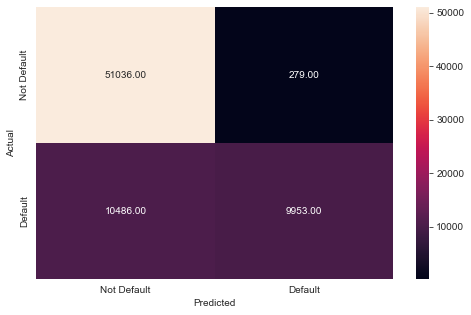

In [40]:
# Checking model performance of LDA
y_pred_train_lda = lda.predict(train2[features])

metrics_score(train2['Default'], y_pred_train_lda)

In [41]:
# Creating the list of column names
cols = features

# Saving coefficients of LDA model
coef_lda = lda.coef_

# Printing the cofficients of LDA
pd.DataFrame(coef_lda, columns = cols).T.sort_values(by = 0, ascending = False)

,0
Demography,0.41
Jobs_Total,0.00
ChargedOff_Amount,0.00
Gross_Amount_Disbursed,-0.00
Code_Franchise,-0.00
Count_Employees,-0.00
Loan_Term,-0.01
Business,-0.08
Revolving_Credit_Line,-0.19
Low_Documentation_Loan,-1.47


**The Precision-Recall Curve for LDA**

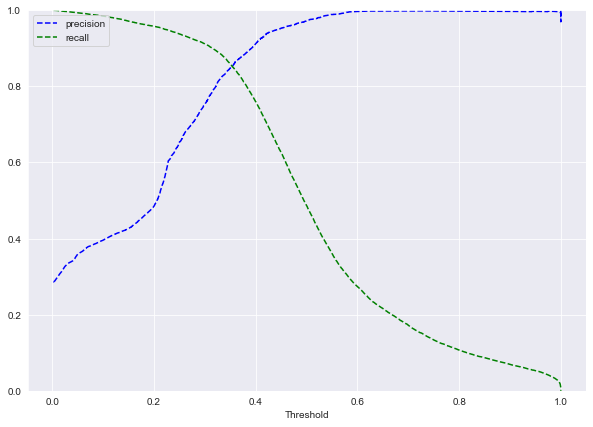

In [42]:
# predict_proba gives the probability of each observation belonging to each class


y_scores_lda = lda.predict_proba(train2[features]) 
precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(train2['Default'], y_scores_lda[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**

- We can see that the precision and the recall are balanced for a threshold of about 0.35.

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     51315
           1       0.85      0.86      0.85     20439

    accuracy                           0.92     71754
   macro avg       0.90      0.90      0.90     71754
weighted avg       0.92      0.92      0.92     71754



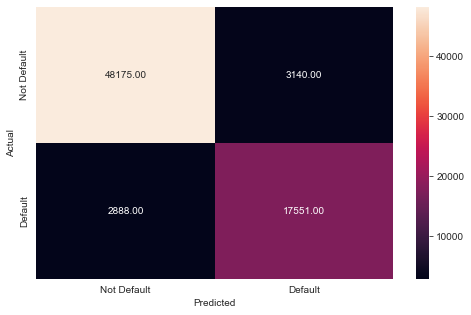

In [43]:
# Let's find out the performance of the lda model at this threshold.

optimal_threshold1 = .35

y_pred_train_lda = lda.predict_proba(train2[features])

metrics_score(train2['Default'], y_pred_train_lda[:,1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     51315
           1       0.98      0.89      0.93     20439

    accuracy                           0.96     71754
   macro avg       0.97      0.94      0.95     71754
weighted avg       0.96      0.96      0.96     71754



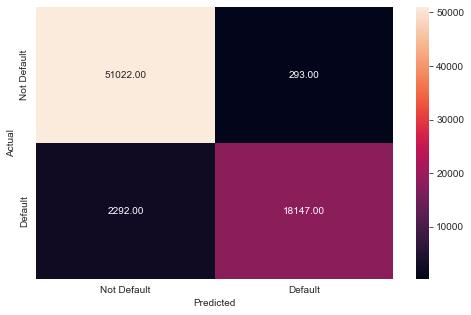

In [44]:
# Let's find out the performance of the qda model at this threshold.

y_pred_train_qda = qda.predict(train2[features])
metrics_score(train2['Default'], y_pred_train_qda)

**Observations:**

- The performance for both LDA and QDA models improved significantly at threshold of .35. The recall has increased significantly for class 1 but the precision has decreased slightly, which is to be expected while adjusting the threshold.
- The QDA model is performing well in terms of accuracy of 96%. The recall for class 1 of 89% is quite low compared to class 0 of 99%, which implies that this model has a high number of false negative, the model will not perform so well in identifying businesses who have a high chance of defaulting their loan. 
- A recall of ~0.89 suggests that there is a 11% chance that the model will predict that a business is not going to default even though they will, and the bank could run the risk of losing their money.
- The average recall and precision for the model are good but let's see if we can get even better performance using other algorithms.

### **Logistic Regression Model**

In [45]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

**Create Dummy Variables**

In [46]:
# Creating the list of columns for which we need to create the dummy variables
#to_get_dummies_for = ['Business', 'Demography', 'State_Of_Bank', 'Low_Documentation_Loan', 'Revolving_Credit_Line']
train4 = train1.copy()
train4.drop('State_Of_Bank', axis = 1, inplace = True)
to_get_dummies_for = ['Business', 'Demography', 'Low_Documentation_Loan', 'Revolving_Credit_Line']

# Creating dummy variables
train4 = pd.get_dummies(data = train4, columns = to_get_dummies_for, drop_first = True)

In [47]:
Y = train4.Default
X = train4.drop(columns = ['Default'])

In [48]:
# Scaling the dataset with Standardscaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [49]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [50]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35920
           1       0.99      0.94      0.96     14307

    accuracy                           0.98     50227
   macro avg       0.98      0.97      0.97     50227
weighted avg       0.98      0.98      0.98     50227



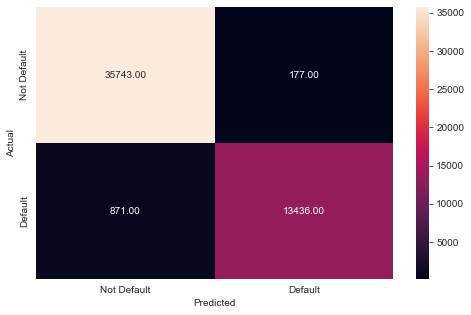

In [51]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15395
           1       0.99      0.94      0.96      6132

    accuracy                           0.98     21527
   macro avg       0.98      0.97      0.97     21527
weighted avg       0.98      0.98      0.98     21527



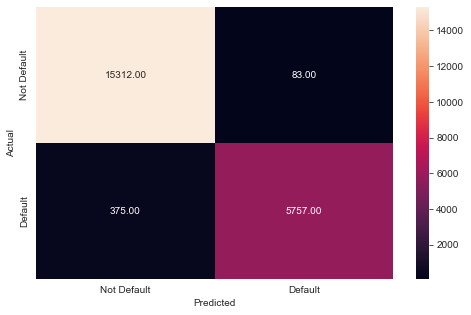

In [52]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Observation:**

- Logistics regression has a much better performance than the previous QDA model with accuracy of 98% and recall of 94%

In [53]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
ChargedOff_Amount,24.47
Demography_Urban,0.26
Jobs_Total,0.13
Business_New,0.03
Demography_Undefined,-0.01
Code_Franchise,-0.04
Count_Employees,-0.11
Revolving_Credit_Line_Yes,-0.22
Low_Documentation_Loan_Yes,-0.37
Loan_Term,-1.52


**Observations:**

- From the co-efficients of the logistics regression model **'ChargedOff_Amount'** is the most important variable in the dataset.

**The Precision-Recall Curve for Logistics Regression**

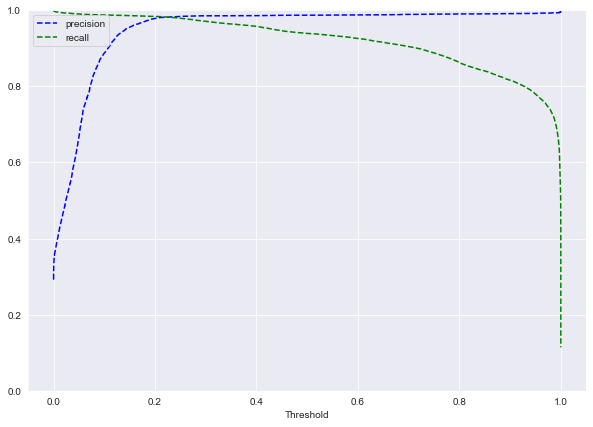

In [54]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35920
           1       0.98      0.98      0.98     14307

    accuracy                           0.99     50227
   macro avg       0.99      0.99      0.99     50227
weighted avg       0.99      0.99      0.99     50227



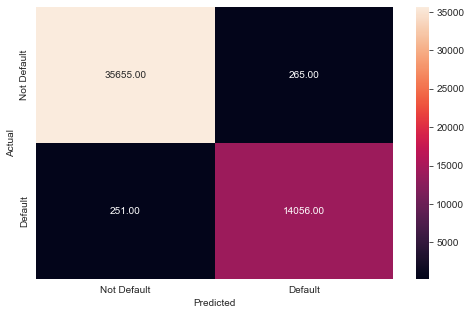

In [55]:
#We can see that the precision and the recall are balanced for a threshold of about 0.25
optimal_threshold1 = .22

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15395
           1       0.98      0.98      0.98      6132

    accuracy                           0.99     21527
   macro avg       0.99      0.99      0.99     21527
weighted avg       0.99      0.99      0.99     21527



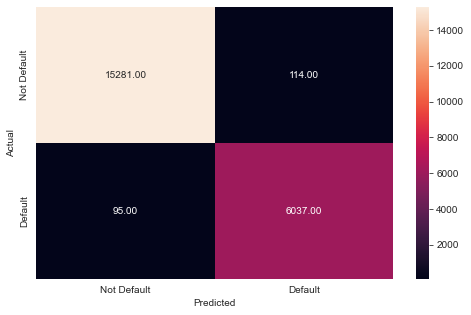

In [56]:
optimal_threshold1 = .22

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:**
- At the threshold of 0.25, the performance of the logistics regression model has improved. The recall score has increased significantly from .94 to .98 for class 1.  

In [57]:
lr_error_rate = (1 - lg.score(x_train, y_train))*100

lrm_r = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r.fit(x_train, y_train)

lrm_r_error_rate = (1 - lrm_r.score(x_train, y_train))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r_error_rate, 2)))

Logistic Regression error rate using all the features is 2.09% 
Logistic Regression error rate using absolute value (Lasso) regularization is 2.04% 


**KNN Classifier**

In [58]:
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.20)
    
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
        test_error.append(1 - knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista
    print(knn_many_split[k])

knn_many_split

[2.6546543557041482e-05, 0.020847435131727387]
[0.012805388948342097, 0.023873515163580862]
[0.012335017379690246, 0.016656712456035568]
[0.01522693146843864, 0.01892627247992568]
[0.014802186771525516, 0.017738403344614774]
[0.01678488174344425, 0.018922954409715302]
[0.01642152592850684, 0.018826730373614712]
[0.018130459669993278, 0.01968942862830978]
[0.017508275055374438, 0.01952020704758113]
[0.019117659258521855, 0.020396177583117656]
[0.018581750910463487, 0.02068816776162984]
[0.019952216221597274, 0.021925807950096226]
[0.01950507287855785, 0.02128873846970601]
[0.020762715379574092, 0.022194571637135847]


{1: [2.6546543557041482e-05, 0.020847435131727387],
 2: [0.012805388948342097, 0.023873515163580862],
 3: [0.012335017379690246, 0.016656712456035568],
 4: [0.01522693146843864, 0.01892627247992568],
 5: [0.014802186771525516, 0.017738403344614774],
 6: [0.01678488174344425, 0.018922954409715302],
 7: [0.01642152592850684, 0.018826730373614712],
 8: [0.018130459669993278, 0.01968942862830978],
 9: [0.017508275055374438, 0.01952020704758113],
 10: [0.019117659258521855, 0.020396177583117656],
 11: [0.018581750910463487, 0.02068816776162984],
 12: [0.019952216221597274, 0.021925807950096226],
 13: [0.01950507287855785, 0.02128873846970601],
 14: [0.020762715379574092, 0.022194571637135847]}

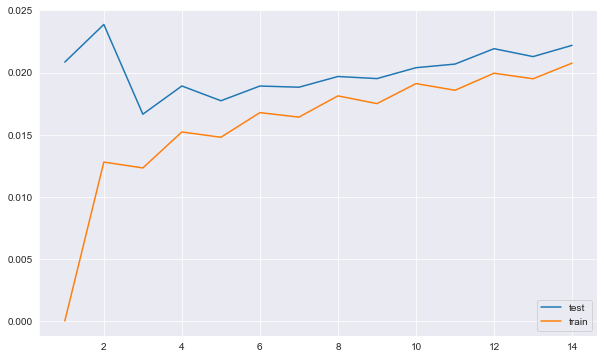

In [59]:
# Extracting k, the train error, and the test error in separate lists for easy plotting

kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observation:**

- From the above graph, we can say that K=5 gives us the generalized model with very similar train and test errors and low error.

In [60]:
# Define K-NN model  let's fit the K-NN model with K=5 on the entire training set.

knn = KNeighborsClassifier(n_neighbors = 5)

In [61]:
# Fitting data to the K-NN model

knn.fit(x_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35920
           1       0.98      0.97      0.97     14307

    accuracy                           0.99     50227
   macro avg       0.98      0.98      0.98     50227
weighted avg       0.99      0.99      0.99     50227



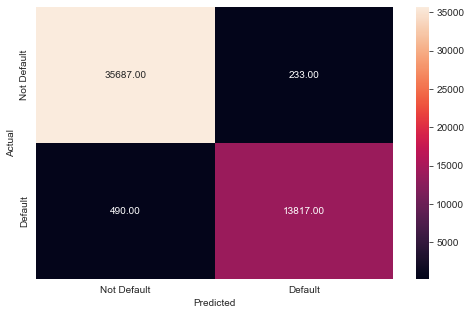

In [62]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(x_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15395
           1       0.98      0.96      0.97      6132

    accuracy                           0.98     21527
   macro avg       0.98      0.98      0.98     21527
weighted avg       0.98      0.98      0.98     21527



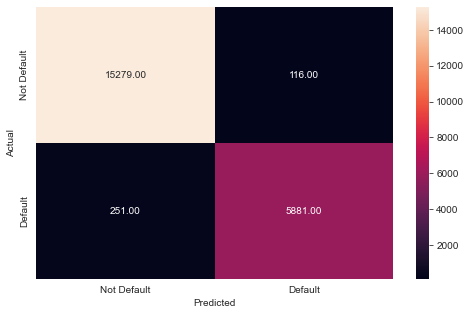

In [63]:
y_pred_test_knn = knn.predict(x_test)

metrics_score(y_test, y_pred_test_knn)

In [64]:
#Using GridSearchCV for Hyperparameter tuning of the model

params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(x_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=4, weights='distance')


In [65]:
# Fit the best estimator on the training data
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35920
           1       1.00      1.00      1.00     14307

    accuracy                           1.00     50227
   macro avg       1.00      1.00      1.00     50227
weighted avg       1.00      1.00      1.00     50227



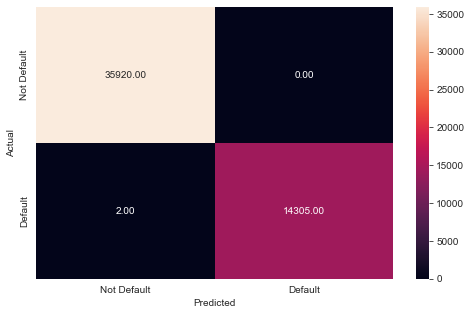

In [66]:
y_pred_train_knn_estimator = knn_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15395
           1       0.98      0.96      0.97      6132

    accuracy                           0.98     21527
   macro avg       0.98      0.98      0.98     21527
weighted avg       0.98      0.98      0.98     21527



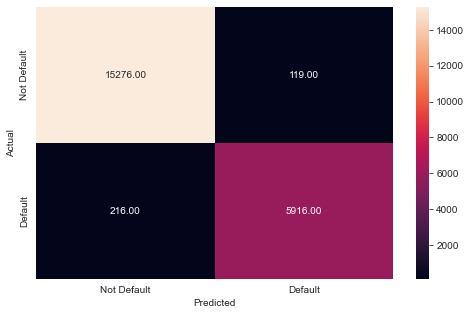

In [67]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_knn_estimator)

**Observations:**
- After tuning the KNN model, model performance did not improve much 

**Decision Tree Model**

In [68]:
# Importing the basic libraries we will require for the project

# Importing the Machine Learning models we require from Scikit-Learn

from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV;
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix,precision_score,accuracy_score;
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.impute import SimpleImputer;
from sklearn.pipeline import Pipeline;
from sklearn import metrics, model_selection;

# Setting the random seed to 1 for reproducibility of results
import random;
random.seed(1);
np.random.seed(1);

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

In [69]:
# Separating the target variable and other variables
X = train1.drop(columns = ['Default', 'State_Of_Bank'])
Y = train1['Default']

test1 = test1.drop('State_Of_Bank', axis = 1)

In [70]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)
test1 = pd.get_dummies(test1, drop_first = True)

In [128]:
test3 = pd.get_dummies(test3, drop_first = True)

In [71]:
X.head(5)

,ChargedOff_Amount,Count_Employees,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Jobs_Total,Business_New,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,Revolving_Credit_Line_Yes
0,0.00,38,"40,640,000.00",126,1,0,0,0,1,0,0
2,0.00,4,"5,961,400.32",90,1,4,0,0,0,1,1
3,0.00,7,"4,064,000.00",126,0,10,1,0,0,1,1
6,"2,022,896.64",2,"7,063,232.00",96,0,6,1,0,0,1,1
7,0.00,10,"4,470,400.00",270,1,0,0,0,1,0,0


In [114]:
test1.head()

,ChargedOff_Amount,Count_Employees,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Jobs_Total,Business_Existing,Business_New,Low_Documentation_Loan_A,Low_Documentation_Loan_C,Low_Documentation_Loan_No,Low_Documentation_Loan_R,Low_Documentation_Loan_S,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,Revolving_Credit_Line_Yes
0,"8,050,784.00",17,"9,403,852.16",57,0,19,1,0,0,0,1,0,0,0,0,1,1
1,0.00,2,"1,625,600.00",90,1,0,1,0,0,0,0,0,0,1,1,0,0
2,"1,625,600.00",2,"3,450,336.00",81,1,12,1,0,0,0,1,0,0,0,0,1,1
3,0.00,2,"6,916,196.48",18,1,2,0,1,0,0,1,0,0,0,0,1,1
4,0.00,6,"31,292,800.00",219,1,0,1,0,0,0,1,0,0,0,0,0,0


In [72]:
# Function to compute different metrics to check classification model performance

def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

In [73]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train.shape);
print('X Test Shape:', X_test.shape);
print('Y Train Shape:', y_train.shape);
print('Y Test Shape:', y_test.shape);

X Train Shape: (50227, 11)
X Test Shape: (21527, 11)
Y Train Shape: (50227,)
Y Test Shape: (21527,)


In [74]:
# Checking for percentage of 'default' and 'non-default' in the target variable

train['Default'].value_counts(normalize = True)

0   0.72
1   0.28
Name: Default, dtype: float64

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35885
           1       1.00      1.00      1.00     14342

    accuracy                           1.00     50227
   macro avg       1.00      1.00      1.00     50227
weighted avg       1.00      1.00      1.00     50227



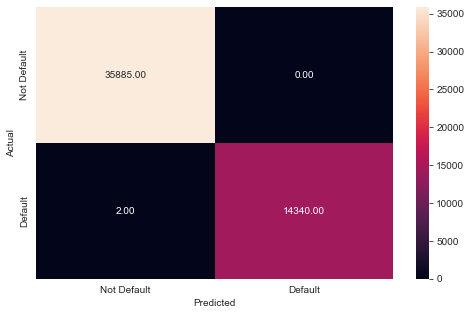

In [75]:
#Decision Tree Classifier after Scaling

scaler = StandardScaler()
dt = DecisionTreeClassifier(random_state=1);
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

dt.fit(X_train_std, y_train)
y_train_pred_dt = dt.predict(X_train_std)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15430
           1       0.98      0.95      0.96      6097

    accuracy                           0.98     21527
   macro avg       0.98      0.97      0.98     21527
weighted avg       0.98      0.98      0.98     21527



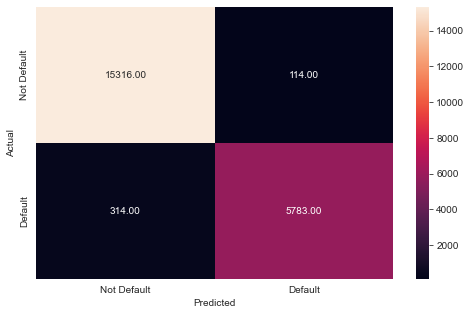

In [76]:
# Checking performance on the test set

y_test_pred_dt = dt.predict(X_test_std);
metrics_score(y_test, y_test_pred_dt)

**Observation:**

- Decicsion Tree model gives a perfect performance on training data with 100% accuracy and a slightly less than perfect performance on the test data (accuracy 98%) which suggests some overfitting.

In [77]:
# K-fold cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_test_std, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores)} ")

The average score of the model with K-5 Cross validation is 0.9849956601085486 


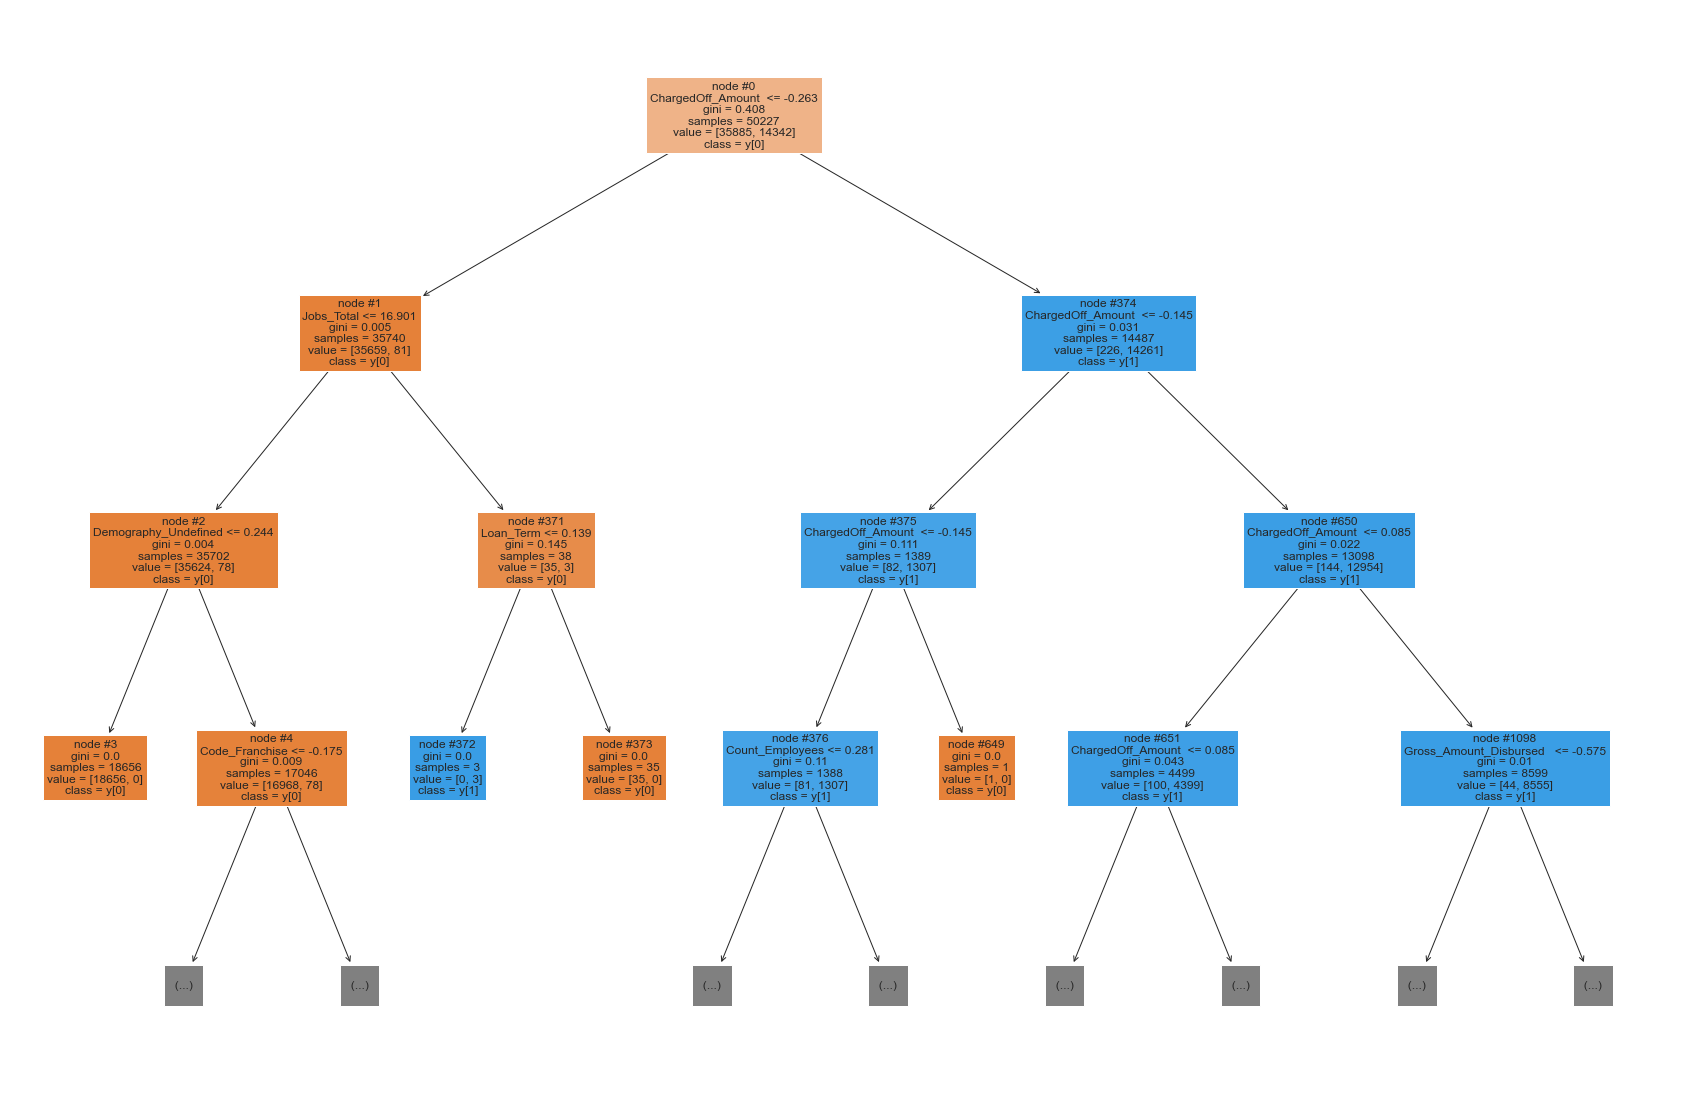

In [78]:
from sklearn import tree;

features = list(X.columns);
plt.figure(figsize=(30,20))
tree.plot_tree(dt, max_depth=3, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True);
plt.show()

**Observations:**

- We can see that the first split is based on the ChargedOff_amount. It is one of the most important factors while figuring out who will default, as we can see that in the leaves, higher 'chargedoff_amount' are more likely to default.
- The second most important feature is the Jobs_Total.


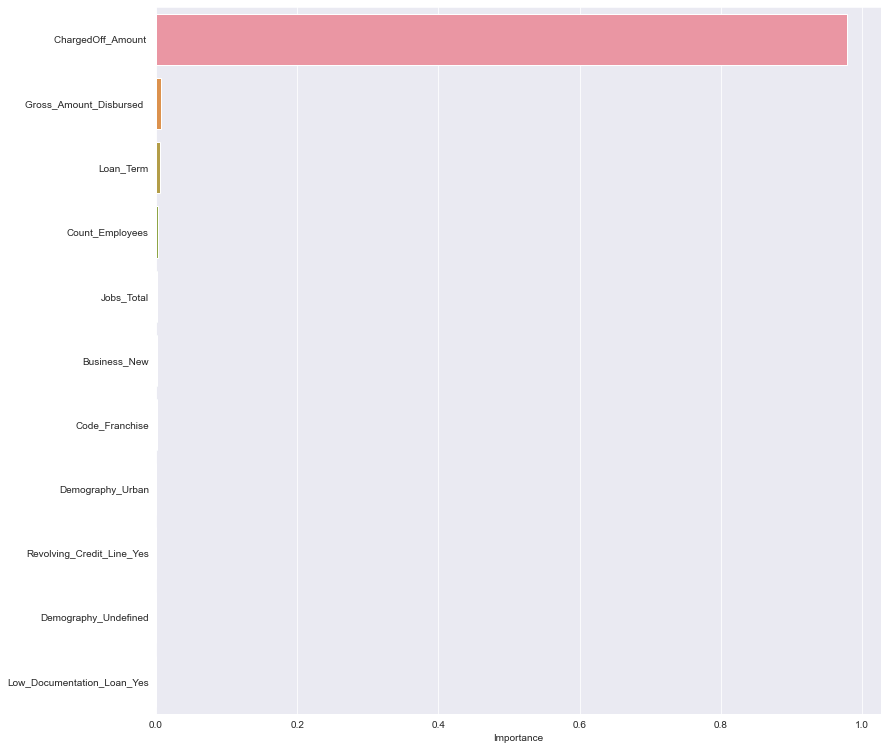

                            Importance
ChargedOff_Amount                 0.98
Gross_Amount_Disbursed            0.01
Loan_Term                         0.01
Count_Employees                   0.00
Jobs_Total                        0.00
Business_New                      0.00
Code_Franchise                    0.00
Demography_Urban                  0.00
Revolving_Credit_Line_Yes         0.00
Demography_Undefined              0.00
Low_Documentation_Loan_Yes        0.00


In [79]:
# Plotting the feature importance

importances = dt.feature_importances_
columns = X.columns;
importance_train = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
plt.figure(figsize=(13,13));
sns.barplot(importance_train.Importance, importance_train.index)
plt.show()

print(importance_train)

**Observation:**
- From the feature importance plot of the Decision tree model, 'Chargedoff_amount' seems to be the single most important feature.

**Decision Trees - Hyperparameter Tuning**

In [80]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.28, 1: 0.72}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.28, 1: 0.72}, criterion='entropy',
                       max_depth=6, min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     35885
           1       0.98      0.99      0.99     14342

    accuracy                           0.99     50227
   macro avg       0.99      0.99      0.99     50227
weighted avg       0.99      0.99      0.99     50227



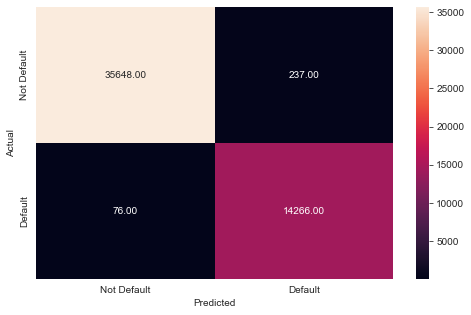

In [81]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15430
           1       0.98      0.99      0.99      6097

    accuracy                           0.99     21527
   macro avg       0.99      0.99      0.99     21527
weighted avg       0.99      0.99      0.99     21527



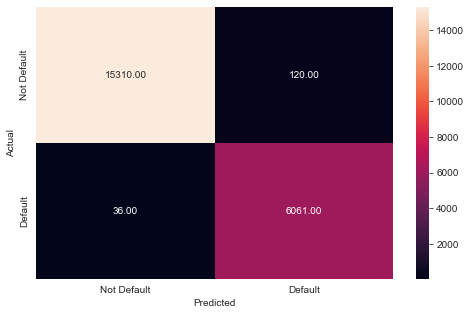

In [82]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

In [83]:
# Model Performance on the test data

dtree_tuned_test = model_performance_classification(dtree_estimator,X_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.99,0.99,0.99


**Observation:**

- The Decision tree model after the hyperparameter tuning shows some improvement, model gives a near perfect performance for **recall, f1-score** and **accuracy** at 99% for both training and test data.
- The Tuned Model is generalizing well and not overfitting.

**Random Forest Model**

In [84]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.28, 1: 0.72}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.28, 1: 0.72}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35885
           1       1.00      1.00      1.00     14342

    accuracy                           1.00     50227
   macro avg       1.00      1.00      1.00     50227
weighted avg       1.00      1.00      1.00     50227



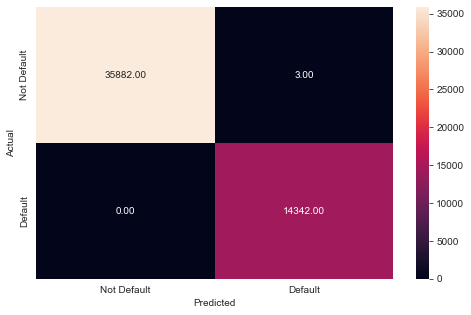

In [85]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15430
           1       0.98      0.99      0.99      6097

    accuracy                           0.99     21527
   macro avg       0.99      0.99      0.99     21527
weighted avg       0.99      0.99      0.99     21527



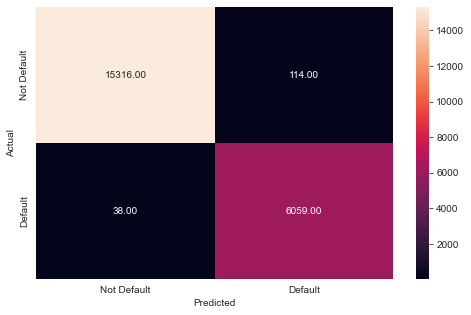

In [86]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [87]:
# Model Performance on the test data

rf_estimator_test = model_performance_classification(rf_estimator,X_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.99,0.99,0.99


**Observation:**

- Random Forest model performing very well with **f1-score** of 99%, **recall** of 99% and **accuracy** of 99%. 

**Random Forest - Hyperparameter Tuning**

In [88]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.28, 1: 0.72}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [89]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.28, 1: 0.72}, max_features=0.7,
                       min_samples_leaf=2, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     35885
           1       0.98      1.00      0.99     14342

    accuracy                           0.99     50227
   macro avg       0.99      1.00      0.99     50227
weighted avg       0.99      0.99      0.99     50227



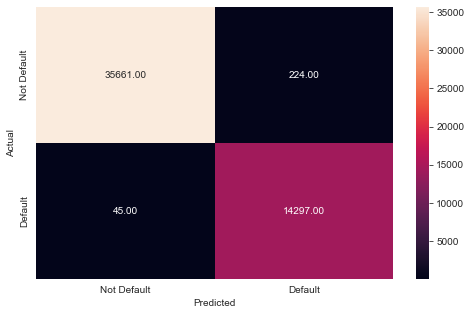

In [90]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

In [91]:
# Model Performance on the test data

rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, X_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.99,0.99,0.99


**Observation:**

- Tuned Random Forest model giving very good performance similar to previous Random Forest model. 
- Model is generalizing well and not overfitting.

### **Boosting Models**

In [92]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

**Adaboost Classifier**

In [93]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     35885
           1       0.98      0.99      0.99     14342

    accuracy                           0.99     50227
   macro avg       0.99      0.99      0.99     50227
weighted avg       0.99      0.99      0.99     50227



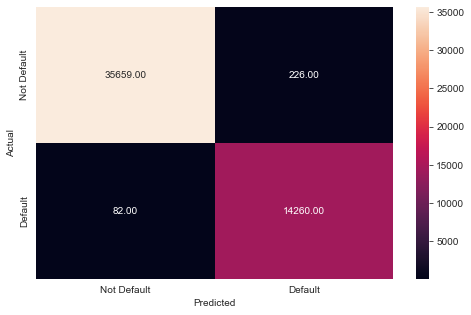

In [94]:
# Checking performance on the training data

y_pred_train_ad = adaboost_model.predict(X_train)
metrics_score(y_train, y_pred_train_ad)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15430
           1       0.98      0.99      0.99      6097

    accuracy                           0.99     21527
   macro avg       0.99      0.99      0.99     21527
weighted avg       0.99      0.99      0.99     21527



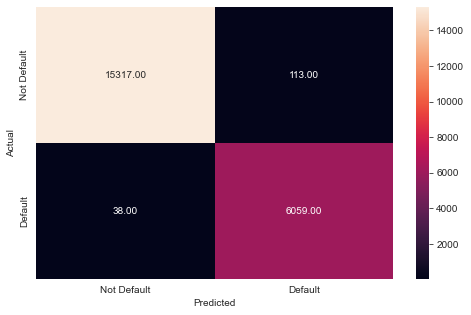

In [95]:
# Checking performance on the test data

y_pred_test_ad = adaboost_model.predict(X_test)
metrics_score(y_test, y_pred_test_ad)

**Observation:**

- Adaboost model giving very good performance with near perfect score accuracy and recall 

<AxesSubplot:xlabel='Importance'>

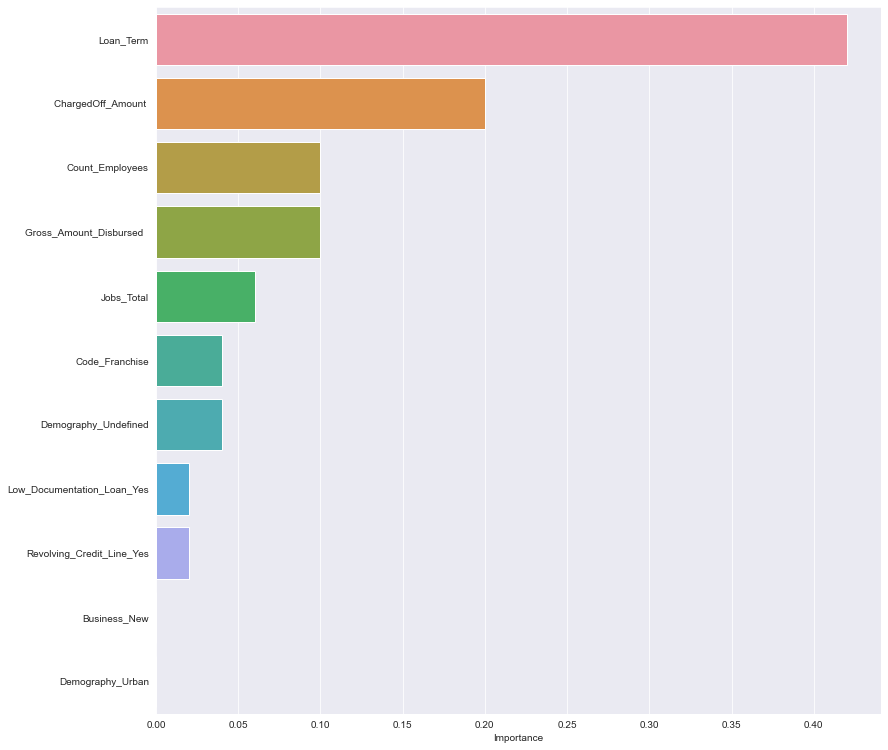

In [96]:
# Plotting the feature importance

importances = adaboost_model.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observation:**
    
- Unlike our previous tree models, the feature importance plot of our Adaboost model shows **'Loan_Term'** as most important feature and **ChargedOff_amount'** second. 

**Adaboost Model - Hyperparameter Tuning**

In [97]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
adaboost_tuned = AdaBoostClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 250, 500],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(adaboost_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
adaboost_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
adaboost_tuned.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [98]:
# Tuned Model Performance on the test data
Tuned_adaboost_model_test = model_performance_classification(adaboost_tuned,X_test,y_test)


Tuned_adaboost_model_test

,Precision,Recall,Accuracy
0,0.99,0.99,0.99


**Observation:**

- Tuned Adaboost model giving very good performance similar to previous Adaboost model with a near perfect score for Accuracy and Recall. 
- Model is generalizing well and not overfitting.

**Gradient Boost Classifier**

In [99]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, X_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.99,0.99,0.99


In [100]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
gbc_tuned = GradientBoostingClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 250, 500],
              'max_depth': np.arange(2, 7),              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(gbc_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
gbc_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=1)

In [101]:
# Model Performance on the test data
Tuned_gbc_model_test = model_performance_classification(gbc_tuned,X_test,y_test)

Tuned_gbc_model_test

,Precision,Recall,Accuracy
0,0.99,0.99,0.99


**Observation:**

- Tuned gbc model performance very good with a near perfect score for Accuracy and Recall. 

**XGBoost Classifier**

In [102]:
# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [103]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,X_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.99,0.99,0.99


In [104]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
xgb_tuned = XGBClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {'learning_rate': [0.01, 0.1],
                'max_depth': [2, 3, 4, 5],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.5, 0.7],
                'colsample_bytree': [0.5, 0.7],
                'n_estimators' : [100, 200],
                "eval_metric": ["logloss", "error"],              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(xgb_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
xgb_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     35885
           1       0.98      0.99      0.99     14342

    accuracy                           0.99     50227
   macro avg       0.99      0.99      0.99     50227
weighted avg       0.99      0.99      0.99     50227



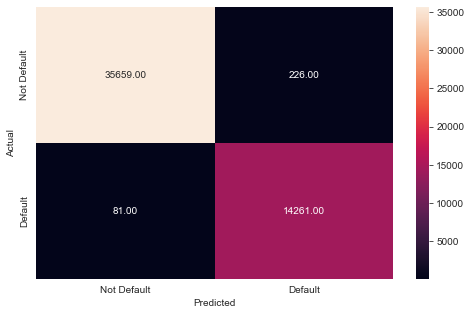

In [105]:
# Checking performance on the training data

y_pred_train_xgb = xgb_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_xgb)

**Observations:**

- The model performance has really improved with the boosting models.
- The boosting models is performing well in terms of accuracy of 99%.
- A recall of ~0.99 suggests that there is a 1% chance that the model will predict that a business is not going to default even though they will, and the bank could run the small risk (1%) of losing their money.
- The average recall and precision for the model are also good.

In [106]:
# Model Performance on the test data
Tuned_xgb_model_test = model_performance_classification(xgb_tuned,X_test,y_test)

Tuned_xgb_model_test

,Precision,Recall,Accuracy
0,0.99,0.99,0.99


**Observation:**

- Tuned xgb model performance very good with a near perfect score for Accuracy and Recall. 

**Support Vector Machine**

In [107]:
from sklearn import svm #Support Vector Machine
from sklearn.svm import SVC #Support Vector Classifier

In [108]:
# SVM Classifier
svm_clf = SVC()

# Fitting the model
svm_clf.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35885
           1       0.99      0.95      0.97     14342

    accuracy                           0.98     50227
   macro avg       0.98      0.97      0.98     50227
weighted avg       0.98      0.98      0.98     50227



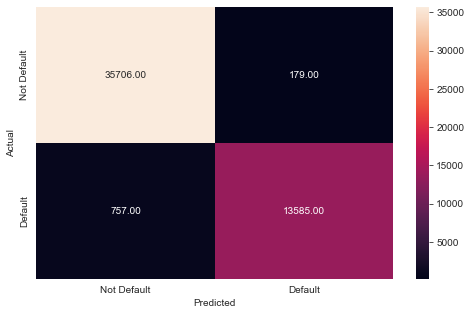

In [109]:
# Checking performance on the test data

y_pred_test_svm = svm_clf.predict(X_train)
metrics_score(y_train, y_pred_test_svm)

In [110]:
# Model Performance on the validation data

svm_model_test = model_performance_classification(svm_clf,X_test,y_test)
svm_model_test

,Precision,Recall,Accuracy
0,0.98,0.97,0.98


**Comparison of all the models we have built so far**

In [111]:
models_test_comp_df = pd.concat(
    
    [    
    dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T, Tuned_adaboost_model_test.T, Tuned_gbc_model_test.T,
    Tuned_xgb_model_test.T, svm_model_test.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Tuned Adaboost classifier",
    "Tuned Gradientboost classifier",
    "Tuned XGBoost classifier",
    "SVM classifier"
]

models_test_comp_df

,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Tuned Adaboost classifier,Tuned Gradientboost classifier,Tuned XGBoost classifier,SVM classifier
Precision,0.99,0.99,0.99,0.99,0.99,0.99,0.98
Recall,0.99,0.99,0.99,0.99,0.99,0.99,0.97
Accuracy,0.99,0.99,0.99,0.99,0.99,0.99,0.98


**Observation:**

- As we can see from the table above the Tuned models are giving very good performance except the SVM model giving a slightly less performance. 

In [131]:
#Predicting on test data using the Tuned Xgboost model.

test_predictions = xgb_tuned.predict(test3)
len(test_predictions), test.shape[0]

(44772, 44772)

In [132]:
# Making a new dataframe to get the display prediction results

test_result = pd.DataFrame()

test_result['ID'] = test['ID']

test_result['Default'] = test_predictions

test_result

,ID,Default
0,105000,1
1,105001,0
2,105002,1
3,105003,0
4,105004,0
...,...,...
44995,149995,1
44996,149996,0
44997,149997,0
44998,149998,0


**Observation:**

- The above dataframe represents our prediction on the test set with an accuracy and recall of 99%
- From our modelling and analysis , the 2 most important features that determines if a customer will default are 'Charged_off_amount' and 'Loan Term'. The higher the "Charged_off_amount", the more likely the customer to default.